In [1]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import confusion_matrix
import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

import os
from collections import defaultdict
from bs4 import BeautifulSoup  
import requests
import zipfile
import io
import nltk
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
#from nltk.tokenize import word_tokenize
nltk.download('stopwords')

#import geopandas as gpd|
#import shapely
import gensim
import tqdm
import tensorflow as tf
import keras

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import SpectralEmbedding
from sklearn.preprocessing import normalize
import sys

path_folder = (os.path.abspath(os.path.join((os.path.abspath(os.path.join(os.getcwd(), os.pardir))),os.pardir)))

google_colab = 0
if google_colab == 1:
    from google.colab import drive
    drive.mount('/content/drive/')
    path_folder = "/content/drive/MyDrive/dsprojects/dsproject_grev/"
    
sys.path.insert(0, path_folder+"/src/features/")
import util

from word2vec_recipe import *

import tqdm
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Benson\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import tqdm
import pickle

from keras.applications.vgg16 import VGG16
#vggnet_model = VGG16()
pics_link_header = "https://lh5.googleusercontent.com/p/"
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

from PIL import Image
import requests
from io import BytesIO

from sklearn.preprocessing import LabelEncoder

In [3]:
import string

In [4]:
USING_SPARK = 0
SPARK_SESSION_VERSION = 1
if USING_SPARK == 1:
    import findspark
    import pyspark
    import pyspark.sql.functions as F
    import pyspark.sql.types as T
    import pyspark.ml as M
    from pyspark.sql.window import Window
    from pyspark.sql import SparkSession
    findspark.init()
    if SPARK_SESSION_VERSION == 1:
        spark = SparkSession.builder.getOrCreate()
    elif SPARK_SESSION_VERSION == 2:
        spark = SparkSession.builder \
            .master('local[*]') \
            .config("spark.driver.memory", "3g") \
            .appName('food_rec') \
            .getOrCreate()
    

In [5]:
vocab_column_names = ["ingredients"]+["name"]
file_name_word2vec = "word2vec_"+("_".join(vocab_column_names))+".pkl"
path_file_word2vec = os.path.join(path_folder, "data","temp",file_name_word2vec)
with open(path_file_word2vec, "rb") as f:
    recipe_word2vec = pickle.load(f)

vocab_column_names = ["ingredients"]#+["name"]
file_name_tfidf = "tfidf_"+("_".join(vocab_column_names))+".pkl"
path_file_tfidf = os.path.join(path_folder, "data","temp",file_name_tfidf)
with open(path_file_tfidf, "rb") as f:
    recipe_tfidf = pickle.load(f)

c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator CountVectorizer from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:315: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.2 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
DATASET_VERSION = ["FULL", "FILTER"][1]  
DROP_ONE_TIME_APPEARANCES = 1
DROP_SEPARATED_ONE_TIME_APPEARANCES = 0
USING_PICS = 0

In [7]:
reviews_dataset_reader = util.Reviews_Dataset_Reader(
    path_folder, 
    DATASET_VERSION, 
    USING_PICS,
    USING_SPARK,
    DROP_ONE_TIME_APPEARANCES, 
    DROP_SEPARATED_ONE_TIME_APPEARANCES,
)

In [8]:
reviews_df = reviews_dataset_reader.build_reviews_df()

1it [00:13, 13.54s/it]
100%|████████████████████████████████████████████████████████████████████████| 11015/11015 [00:00<00:00, 444647.98it/s]


In [9]:
stop_words = stopwords.words('english')
lexicon = [word for word in recipe_tfidf.vocab2idx if word not in stop_words]

In [10]:
word2vec_dataset_reader = util.Word2vec_Dataset_Reader(
    recipe_word2vec,
    lexicon,
)
word2vec_df = word2vec_dataset_reader.build_word2vec_df()

In [11]:
# pretend the filt was stacked with train test and pics words added already

In [12]:
# filter (pandas) or full (pyspark)
# interaction ( no negative sampling) or rating
# with or without tf idf weighting
# dotproducting

In [21]:
class Temp_Interaction_Model_Builder:
    def __init__(
        self,
        recipe_tfidf,
        word2vec_df,
        with_tfidf_weighting = 1,
        with_concatenated = 1
    ):
        self.recipe_tfidf = recipe_tfidf
        self.word2vec_df = word2vec_df
        self.with_tfidf_weighting = with_tfidf_weighting
        self.with_concatenated = with_concatenated
    def set_up(self, reviews_df):
        # reviews_df must be all positives, and before train/test split

        reviews_df["review_id"] = np.arange(reviews_df.shape[0])
        id_df = reviews_df[["user_id","business_id","review_id"]]
        review_df = reviews_df[["review_id","review_text"]]
        
        review_df["review_text"] = util.clean_text_column(review_df["review_text"]).str.split(" ")
        review2word_df = review_df.explode("review_text")
        print("Exploded review_text")
        review2word_df = review2word_df[~(review2word_df["review_text"].isin(stop_words))]
        review2word_df = review2word_df[(review2word_df["review_text"].isin(recipe_word2vec.wv.vocab))]
        review2word_df = review2word_df[(review2word_df["review_text"].isin(recipe_tfidf.vocab2idx))]
        review2word_df = review2word_df[(review2word_df["review_text"] != "")]
        print("Filtered exploded review_text")
                
        review_df = review_df[(review_df["review_id"].isin(pd.unique(review2word_df["review_id"])))]
        # Remove double singletons

        business_id_frequency = id_df.groupby(["business_id"],as_index=False).agg({"business_id": "count"}).reset_index()
        business_id_frequency.rename(columns={"business_id":"count", "index": "business_id"},inplace=True)

        user_id_frequency = id_df.groupby(["user_id"],as_index=False).agg({"business_id": "count"}).reset_index()
        user_id_frequency.rename(columns={"user_id":"count", "index": "user_id"},inplace=True)

        one_time_business_id_list = business_id_frequency[business_id_frequency["count"] == 1]["business_id"]
        one_time_user_id_list = user_id_frequency[user_id_frequency["count"] == 1]["user_id"]

        id_df = id_df[
            ~( (id_df["business_id"].isin(one_time_business_id_list)) & (id_df["user_id"].isin(one_time_user_id_list)))
        ]
        del business_id_frequency
        del user_id_frequency
        del one_time_business_id_list
        del one_time_user_id_list
        
        print("Removed double singletons")
        
        review2word_df["word_count"] = 1
        review2word_df.sort_values(["review_id"], inplace=True)
        id2review2word_df = id_df.merge(review2word_df, on=["review_id"])
        
        review2word_df["word_count"] = 1
        review2word_df.sort_values(["review_id"], inplace=True)
        id2review2word_df = id_df.merge(review2word_df, on=["review_id"])
        
        print("Building user embeddings")

        user2review2word_df = id2review2word_df[["user_id", "review_id","review_text"]]
        user2review_df = user2review2word_df.groupby(["user_id"], as_index=False).agg({
            "review_id": list,
            "review_text": list})
        user2review_df["review_text"] = user2review_df["review_text"].apply(lambda x: " ".join(x))

        vectorizer = Pipeline([('count', CountVectorizer(
            vocabulary=self.recipe_tfidf.vocab2idx,
            stop_words=stop_words,
            max_df=1,
        )), ('tfidf', TfidfTransformer())])
        vectorizer.fit(user2review_df['review_text'])
        tfidf_features = vectorizer.transform(user2review_df["review_text"])##
        assert (user2review_df.shape[0] == tfidf_features.shape[0])
        user2review_df["review_text"] = user2review_df["review_text"].str.split(" ")
        tfidf_features_column = pd.Series([tfidf_features[i].A[0] for i in range(tfidf_features.shape[0])])
        def get_tfidfs_sentence(row_idx, words):
            return [(tfidf_features_column.iloc[row_idx][self.recipe_tfidf.vocab2idx[word]]) for word in words]
        word_counts_column = [get_tfidfs_sentence(i, words) for i, words in enumerate(user2review_df["review_text"].values)]

        user2review_df["word_count"] = word_counts_column

        user2review2word_df = user2review_df.explode(["review_id", "review_text","word_count"])
        if self.with_tfidf_weighting == 1:
            # undo all tf-idf weighting (treat it as a regular unweighted average)
            user2review2word_df["word_count"] = 1
        user2review2word2vec_df = user2review2word_df.merge(self.word2vec_df, on=["review_text"])

        id_review_df_agg_user = (
            user2review2word2vec_df.groupby(["user_id"], as_index=False).agg(
                {"vec": list, "word_count": np.sum})
        )
        id_review_df_agg_user["vec"] = id_review_df_agg_user["vec"].apply(lambda x: np.sum(np.array(x), axis=0))
        id_review_df_agg_user = id_review_df_agg_user.rename(
            columns={"vec": "user_vec", "word_count": "user_word_count"}
        )

        id_review_df_agg_user_review = (
            user2review2word2vec_df.copy().groupby(["review_id"], as_index=False).agg(
                {"vec": list, "word_count": np.sum})
        )
        id_review_df_agg_user_review["vec"] = id_review_df_agg_user_review["vec"].apply(lambda x: np.sum(np.array(x), axis=0))

        print("Building business embeddings")

        business2review2word_df = id2review2word_df[["business_id", "review_id", "review_text"]]
        business2review_df = business2review2word_df.groupby(["business_id"], as_index=False).agg({
            "review_id": list,
            "review_text": list})
        business2review_df["review_text"] = business2review_df["review_text"].apply(lambda x: " ".join(x))

        # Create an instance of the TfidfVectorizer class
        vectorizer = Pipeline([('count', CountVectorizer(
            vocabulary=self.recipe_tfidf.vocab2idx,
            stop_words=stop_words,
            max_df=1,
        )), ('tfidf', TfidfTransformer())])
        # Use the `fit_transform` method to learn the vocabulary and transform the data
        vectorizer.fit(business2review_df['review_text'])

        tfidf_features = vectorizer.transform(business2review_df["review_text"])##
        assert (business2review_df.shape[0] == tfidf_features.shape[0])
        business2review_df["review_text"] = business2review_df["review_text"].str.split(" ")
        tfidf_features_column = pd.Series([tfidf_features[i].A[0] for i in range(tfidf_features.shape[0])])
        def get_tfidfs_sentence(row_idx, words):
            return [(tfidf_features_column.iloc[row_idx][self.recipe_tfidf.vocab2idx[word]]) for word in words]
        word_counts_column = [get_tfidfs_sentence(i, words) for i, words in enumerate(business2review_df["review_text"].values)]

        business2review_df["word_count"] = word_counts_column

        business2review2word_df = business2review_df.explode(["review_id", "review_text","word_count"])

        if self.with_tfidf_weighting == 1:
            # undo all tf-idf weighting (treat it as a regular unweighted average)
            business2review2word_df["word_count"] = 1
        
        business2review2word_df = business2review2word_df.merge(self.word2vec_df, on=["review_text"])

        id_review_df_agg_business = (
            business2review2word_df.groupby(["business_id"], as_index=False).agg(
                {"vec": list, "word_count": np.sum})
        )
        id_review_df_agg_business["vec"] = id_review_df_agg_business["vec"].apply(lambda x: np.sum(np.array(x), axis=0))
        id_review_df_agg_business = id_review_df_agg_business.rename(
            columns={"vec": "business_vec", "word_count": "business_word_count"}
        )

        id_review_df_agg_business_review = (
            business2review2word_df.groupby(["review_id"], as_index=False).agg(
                {"vec": list, "word_count": np.sum})
        )
        id_review_df_agg_business_review["vec"] = id_review_df_agg_business_review["vec"].apply(
            lambda x: np.sum(np.array(x), axis=0)
        )
        
        print("Divisions for the mean")
        id2vec_df = id2review2word_df.copy() # 1st appearance of id2vec_df
        id2vec_df = id2vec_df[["user_id","business_id","review_id"]].drop_duplicates()

        id2vec_df = id2vec_df.merge(id_review_df_agg_user, on=["user_id"])
        id2vec_df = id2vec_df.merge(id_review_df_agg_user_review, on=["review_id"])
        id2vec_df["user_vec"] -= id2vec_df["vec"]
        id2vec_df["user_word_count"] -=id2vec_df["word_count"]
        id2vec_df = id2vec_df[id2vec_df["user_word_count"] != 0]
        id2vec_df["user_vec"] /= id2vec_df["user_word_count"]
        id2vec_df.drop(columns=["vec","word_count"],inplace=True)

        id2vec_df = id2vec_df.merge(id_review_df_agg_business, on=["business_id"])
        id2vec_df = id2vec_df.merge(id_review_df_agg_business_review, on=["review_id"])
        id2vec_df["business_vec"] -= id2vec_df["vec"]
        id2vec_df["business_word_count"] -=id2vec_df["word_count"]
        id2vec_df = id2vec_df[id2vec_df["business_word_count"] != 0]
        id2vec_df["business_vec"] /= id2vec_df["business_word_count"]
        id2vec_df.drop(columns=["vec","word_count"],inplace=True)
        
        normalize_vector = lambda x: np.array(x)/np.linalg.norm(np.array(x))

        id2vec_df.drop(columns=["user_word_count","business_word_count"],inplace=True)
        if self.with_concatenated == 1:
            conjoined_vecs = (
                id2vec_df["user_vec"].apply(list) + id2vec_df["business_vec"].apply(list)
            ).values
        else:
            conjoined_vecs = (
                (id2vec_df["user_vec"].apply(normalize_vector)) * \
                (id2vec_df["business_vec"].apply(normalize_vector))
            )
        train_X_curr_excluded_from_average = np.array(conjoined_vecs.tolist())
        train_y_curr_excluded_from_average = np.ones(train_X_curr_excluded_from_average.shape[0])

        id_review_df_agg_user["user_vec"] /= id_review_df_agg_user["user_word_count"]
        id_review_df_agg_business["business_vec"] /= id_review_df_agg_business["business_word_count"]

        user2vec_df = id_review_df_agg_user[["user_id","user_vec"]]
        self.user2vec_df = user2vec_df
        business2vec_df = id_review_df_agg_business[["business_id", "business_vec"]]
        self.business2vec_df = business2vec_df

        chunk_size = 5000
        print("Fabricating negative samples")

        valid_pairs = id2vec_df[["user_id", "business_id"]].reset_index(drop=True)

        num_valid_pairs = valid_pairs.shape[0]

        fraction = (chunk_size/id2vec_df.shape[0])
        user_fraction = fraction
        business_fraction = fraction
        sampled_user_id_column = id2vec_df["user_id"].sample(frac=user_fraction).reset_index(drop=True)
        sampled_business_id_column = id2vec_df["business_id"].sample(frac=business_fraction).reset_index(drop=True)

        sampled_pairs = pd.DataFrame()
        sampled_pairs["user_id"] = sampled_user_id_column.values
        sampled_pairs["business_id"] = sampled_business_id_column.values
        sampled_pairs.reset_index(inplace=True,drop=True)

        sampled_pairs = pd.merge(sampled_pairs, 
                                 valid_pairs, 
                                 on=['user_id', 'business_id'], 
                                 how='outer', 
                                 indicator=True)
        sampled_pairs = sampled_pairs[sampled_pairs['_merge'] == 'left_only']
        sampled_pairs = sampled_pairs.drop(columns=['_merge'])

        while sampled_pairs.shape[0] < num_valid_pairs:
            print("\t", sampled_pairs.shape[0])
            temp_sampled_user_id_column = id2vec_df["user_id"].sample(frac=user_fraction).reset_index(drop=True)
            temp_sampled_business_id_column = id2vec_df["business_id"].sample(frac=business_fraction).reset_index(drop=True)

            temp_sampled_pairs = pd.DataFrame()
            temp_sampled_pairs["user_id"] = temp_sampled_user_id_column.values
            temp_sampled_pairs["business_id"] = temp_sampled_business_id_column.values
            temp_sampled_pairs.reset_index(inplace=True,drop=True)

            temp_sampled_pairs = pd.merge(
                temp_sampled_pairs, 
                valid_pairs, 
                on=['user_id', 'business_id'], 
                how='outer', 
                indicator=True)
            temp_sampled_pairs = temp_sampled_pairs[temp_sampled_pairs['_merge'] == 'left_only']
            temp_sampled_pairs = temp_sampled_pairs.drop(columns=['_merge'])
            sampled_pairs = pd.concat([sampled_pairs,temp_sampled_pairs],axis=0)

        id2vec_df_unseen = sampled_pairs.merge(user2vec_df,on=["user_id"])
        id2vec_df_unseen = id2vec_df_unseen.merge(business2vec_df,on=["business_id"])
        
        if self.with_concatenated == 1:
            conjoined_vecs = (
                id2vec_df_unseen["user_vec"].apply(list) + id2vec_df_unseen["business_vec"].apply(list)
            ).values
        else:
            conjoined_vecs = (
                (id2vec_df_unseen["user_vec"].apply(normalize_vector)) * \
                (id2vec_df_unseen["business_vec"].apply(normalize_vector))
            )
        

        train_X_averages_with_curr_bc_unseen = np.array(conjoined_vecs.tolist())
        train_y_averages_with_curr_bc_unseen = np.zeros(train_X_averages_with_curr_bc_unseen.shape[0])

        existing_interaction_pairs = train_X_curr_excluded_from_average
        non_existing_interaction_pairs = train_X_averages_with_curr_bc_unseen
        train_X_seen = train_X_curr_excluded_from_average
        train_X_unseen = train_X_averages_with_curr_bc_unseen
        train_y_seen = train_y_curr_excluded_from_average
        train_y_unseen = train_y_averages_with_curr_bc_unseen

        train_dataset_size = len(existing_interaction_pairs)+len(non_existing_interaction_pairs)
        train_dataset_indexer = np.arange(train_dataset_size)
        np.random.shuffle(train_dataset_indexer)

        train_X = np.vstack((train_X_curr_excluded_from_average,train_X_averages_with_curr_bc_unseen))
        train_y = np.hstack((train_y_curr_excluded_from_average,train_y_averages_with_curr_bc_unseen))

        train_X = train_X[train_dataset_indexer]
        train_y = train_y[train_dataset_indexer]
        X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.25)
        
        pca = PCA(2)
        temp_X_pca_input = train_X
        temp_y_pca_input = train_y

        Z = pca.fit_transform(temp_X_pca_input)
        fig, ax = plt.subplots(figsize=(8,8))
        ax.scatter(Z[:,0], Z[:,1],c=temp_y_pca_input, alpha=0.1, s=5, cmap="winter")
        
        return X_train, X_val, y_train, y_val

In [22]:
#

In [23]:
temp_interaction_model_builder = Temp_Interaction_Model_Builder(
    recipe_tfidf,
    word2vec_df,
    with_concatenated = 0
)

c:\users\benson\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Exploded review_text
Filtered exploded review_text
Removed double singletons
Building user embeddings
Building business embeddings
Divisions for the mean
Fabricating negative samples
	 4997
	 9994
	 14993
	 19989
	 24986
	 29983
	 34977
	 39972
	 44970
	 49968
	 54963
	 59961
	 64960
	 69955
	 74950
	 79945
	 84942
	 89941


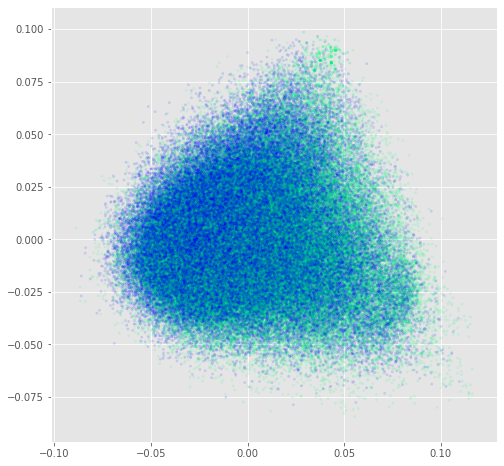

In [25]:
X_train, X_val, y_train, y_val = temp_interaction_model_builder.set_up(reviews_df)

In [26]:
X_train, X_val, y_train, y_val

(array([[ 0.00246895,  0.00620406,  0.00712593, ...,  0.00332354,
          0.00250379,  0.00040276],
        [-0.00108148,  0.00087672,  0.00609731, ...,  0.00273545,
         -0.00021203, -0.00022134],
        [ 0.00194885,  0.00303573,  0.00603766, ...,  0.00081743,
          0.00186387,  0.00486705],
        ...,
        [ 0.00032822,  0.00561007,  0.00017586, ...,  0.0040025 ,
          0.00140931, -0.00074282],
        [-0.00128834,  0.00386488,  0.00868899, ...,  0.00939603,
         -0.00041149,  0.01179444],
        [-0.00387777, -0.00072942,  0.02352474, ..., -0.0006237 ,
          0.00785135, -0.0062566 ]], dtype=float32),
 array([[-1.26982981e-04, -1.27520075e-03,  1.01108160e-02, ...,
          2.16785120e-04, -2.05175322e-03,  9.15709790e-03],
        [ 6.59746758e-04, -3.54146049e-03,  2.00275402e-03, ...,
          3.16391961e-04,  5.80187989e-05,  3.13493051e-03],
        [ 1.56149815e-03, -1.07315725e-04,  6.48024166e-03, ...,
          1.95279974e-03,  1.26535515e-03

AUC: 0.6049495835078637


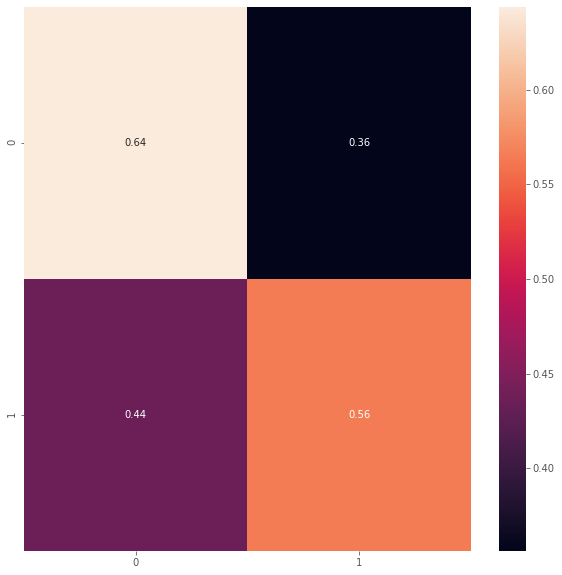

In [27]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=800, class_weight="balanced")
log_reg.fit(X_train, y_train)
lr_y_pred = log_reg.predict(X_val)

y_true = y_val
y_pred = lr_y_pred
conf_matrix = confusion_matrix(y_true, y_pred,normalize="true")
fig, ax2 = plt.subplots(figsize=(10,10)) 
ax2 = sns.heatmap(conf_matrix, annot=True) #notation: "annot" not "annote"
y_lims = ax2.get_ylim()
ax2.set_ylim(sum(y_lims), 0)

from sklearn.metrics import roc_auc_score
print("AUC:", roc_auc_score(y_pred.astype(int), y_true.astype(int)))

Epoch 1/10
1418/1418 [==============================] - 5s 3ms/step - loss: 0.6586 - accuracy: 0.6018
Epoch 2/10
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6501 - accuracy: 0.6139
Epoch 3/10
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6479 - accuracy: 0.6158
Epoch 4/10
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6454 - accuracy: 0.6185
Epoch 5/10
1418/1418 [==============================] - 5s 3ms/step - loss: 0.6440 - accuracy: 0.6209
Epoch 6/10
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6428 - accuracy: 0.6203
Epoch 7/10
1418/1418 [==============================] - 5s 3ms/step - loss: 0.6417 - accuracy: 0.6229
Epoch 8/10
1418/1418 [==============================] - 5s 4ms/step - loss: 0.6404 - accuracy: 0.6246
Epoch 9/10
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6397 - accuracy: 0.6252
Epoch 10/10
1477/1477 [==============================] - 3s 2ms/step
Val Loss:  0.

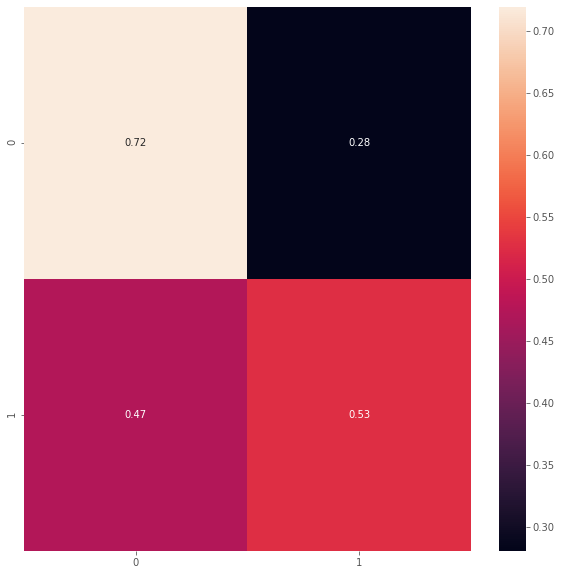

In [34]:
model = Sequential()
model.add(Dense(50, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=100)

val_loss, val_acc = model.evaluate(X_val, y_val)
predictions = model.predict(X_val)


print("Val Loss: ", val_loss, ", Test Accuracy: ", val_acc)
y_true = y_val
y_pred = np.squeeze((predictions >= 0.5).astype(int))
conf_matrix = confusion_matrix(y_true, y_pred,normalize="true")
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(conf_matrix, annot=True) #notation: "annot" not "annote"
y_lims = ax.get_ylim()
ax.set_ylim(sum(y_lims), 0)

from sklearn.metrics import roc_auc_score
print("AUC:", roc_auc_score(y_pred.astype(int), y_true.astype(int)))